# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Moch. Yusuf Haidar Ali Ramdhani
- **Email:** mochy020203@gmail.com
- **ID Dicoding:** daniel_co

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola penggunaan sepeda harian berubah berdasarkan musim sepanjang tahun?
- Pertanyaan 2 : Apakah ada hubungan antara suhu udara dengan jumlah sepeda yang dipinjam?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset memiliki 731 entri dan 16 kolom.
- Kolom-kolom mencakup informasi tentang tanggal, musim, kondisi cuaca, dan jumlah peminjaman sepeda, baik oleh pengguna casual maupun terdaftar.
- Tidak ada nilai yang hilang di kolom mana pun.

### Assessing Data

In [3]:
print("Informasi Dataset:")
df.info()

print("\nJumlah Missing Values:")
print(df.isnull().sum())

print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Jumlah Missing Values:
instant       0
dteday        0
season        0
yr

In [4]:
valid_season = [1, 2, 3, 4]
valid_weathersit = [1, 2, 3, 4]
valid_mnth = list(range(1, 13))
valid_weekday = list(range(0, 7))

inconsistent_season = df[~df['season'].isin(valid_season)]
inconsistent_weathersit = df[~df['weathersit'].isin(valid_weathersit)]
inconsistent_mnth = df[~df['mnth'].isin(valid_mnth)]
inconsistent_weekday = df[~df['weekday'].isin(valid_weekday)]

print("\nInconsistent Values:")
print(f"Season: {len(inconsistent_season)}")
print(f"Weathersit: {len(inconsistent_weathersit)}")
print(f"Month: {len(inconsistent_mnth)}")
print(f"Weekday: {len(inconsistent_weekday)}")

numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
outliers = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print("\nOutliers Summary:")
for col, count in outliers.items():
    print(f"{col}: {len(count)} outliers")


Inconsistent Values:
Season: 0
Weathersit: 0
Month: 0
Weekday: 0

Outliers Summary:
temp: 0 outliers
atemp: 0 outliers
hum: 2 outliers
windspeed: 13 outliers
casual: 44 outliers
registered: 0 outliers
cnt: 0 outliers


**Insight:**
- Tidak ada baris duplikat dalam dataset.
- Tidak ada baris missing value dalam dataset.
- Tidak ada baris (season, weathersit, month, day) inconsistent dalam dataset.
- Terdapat beberapa outlier pada kolom hum, windspeed, dan casual

### Cleaning Data

In [5]:
from scipy.stats import zscore

outlier_mask_hum = (df['hum'] < (df['hum'].quantile(0.25) - 1.5 * (df['hum'].quantile(0.75) - df['hum'].quantile(0.25)))) | (df['hum'] > (df['hum'].quantile(0.75) + 1.5 * (df['hum'].quantile(0.75) - df['hum'].quantile(0.25))))
outlier_mask_windspeed = (df['windspeed'] < (df['windspeed'].quantile(0.25) - 1.5 * (df['windspeed'].quantile(0.75) - df['windspeed'].quantile(0.25)))) | (df['windspeed'] > (df['windspeed'].quantile(0.75) + 1.5 * (df['windspeed'].quantile(0.75) - df['windspeed'].quantile(0.25))))
outlier_mask_casual = (df['casual'] < (df['casual'].quantile(0.25) - 1.5 * (df['casual'].quantile(0.75) - df['casual'].quantile(0.25)))) | (df['casual'] > (df['casual'].quantile(0.75) + 1.5 * (df['casual'].quantile(0.75) - df['casual'].quantile(0.25))))

df.loc[outlier_mask_hum, 'hum'] = df['hum'].median()
df.loc[outlier_mask_windspeed, 'windspeed'] = df['windspeed'].median()
df.loc[outlier_mask_casual, 'casual'] = df['casual'].median()

print("\nData Setelah Imputasi Outlier:")
print(df[['hum', 'windspeed', 'casual']].describe())



Data Setelah Imputasi Outlier:
              hum   windspeed       casual
count  731.000000  731.000000   731.000000
mean     0.629352    0.186295   730.865937
std      0.139566    0.071153   505.495353
min      0.254167    0.022392     2.000000
25%      0.522291    0.134950   315.500000
50%      0.626667    0.180975   713.000000
75%      0.730209    0.229785   999.500000
max      0.972500    0.378108  2258.000000


In [6]:
numerical_columns = ['hum', 'windspeed', 'casual']
outliers = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print("\nOutliers Summary:")
for col, count in outliers.items():
    print(f"{col}: {len(count)} outliers")


Outliers Summary:
hum: 0 outliers
windspeed: 4 outliers
casual: 18 outliers


**Insight:**
- Setelah membersihkan data, dataset siap untuk dianalisis.
- Outlier telah dilakukan cleaning dengan metode imputasi menggunakan IQR sehingga sebagian besar outlier dapat dikurangi
- Outlier mungkin memberikan wawasan tambahan, misalnya hari-hari dengan peminjaman sepeda yang ekstrem.

## Exploratory Data Analysis (EDA)

### Explore

In [7]:
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.629352    0.186295   
std 

In [8]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_label'] = df['season'].map(season_mapping)

season_usage = df.groupby('season_label')['cnt'].describe()
print("Seasonal Bike Usage (Summary):")
print(season_usage)

avg_usage_per_season = df.groupby('season_label')['cnt'].mean()
print("\nAverage Usage Per Season:")
print(avg_usage_per_season)

Seasonal Bike Usage (Summary):
              count         mean          std     min     25%     50%  \
season_label                                                            
Fall          188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5   
Spring        181.0  2604.132597  1399.942119   431.0  1538.0  2209.0   
Summer        184.0  4992.331522  1695.977235   795.0  4003.0  4941.5   
Winter        178.0  4728.162921  1699.615261    22.0  3615.5  4634.5   

                  75%     max  
season_label                   
Fall          6929.25  8714.0  
Spring        3456.00  7836.0  
Summer        6377.00  8362.0  
Winter        5624.50  8555.0  

Average Usage Per Season:
season_label
Fall      5644.303191
Spring    2604.132597
Summer    4992.331522
Winter    4728.162921
Name: cnt, dtype: float64


**Insight:**
- Musim Gugur (Fall) memiliki rata-rata penggunaan sepeda harian tertinggi, yaitu 5644 sepeda/hari, dengan rentang maksimum mencapai 8714 sepeda/hari. Hal ini menunjukkan bahwa musim ini cenderung menjadi puncak aktivitas bersepeda, kemungkinan karena cuaca yang mendukung (tidak terlalu panas atau dingin).
- Musim Semi (Spring) memiliki rata-rata penggunaan terendah, yaitu 2604 sepeda/hari, dengan rentang maksimum hanya mencapai 7836 sepeda/hari. Hal ini mungkin disebabkan oleh cuaca yang kurang stabil di musim ini.
- Musim Panas (Summer) dan Musim Dingin (Winter) menunjukkan pola penggunaan yang stabil dengan rata-rata masing-masing 4992 sepeda/hari dan 4728 sepeda/hari.
- Fall dan Summer memiliki kisaran (IQR) yang lebih tinggi, menunjukkan bahwa distribusi data penggunaan sepeda di musim ini lebih luas dibandingkan dengan Spring.



In [9]:
temp_cnt_summary = df[['temp', 'cnt']].describe()
print("\nTemperature and Bike Usage (Summary):")
print(temp_cnt_summary)

temp_cnt_corr = df['temp'].corr(df['cnt'])
print("\nCorrelation Between Temperature and Bike Usage:")
print(f"Correlation Coefficient: {temp_cnt_corr}")


Temperature and Bike Usage (Summary):
             temp          cnt
count  731.000000   731.000000
mean     0.495385  4504.348837
std      0.183051  1937.211452
min      0.059130    22.000000
25%      0.337083  3152.000000
50%      0.498333  4548.000000
75%      0.655417  5956.000000
max      0.861667  8714.000000

Correlation Between Temperature and Bike Usage:
Correlation Coefficient: 0.6274940090334918


**Insight:**
- Rata-rata suhu yang dinormalisasi adalah 0.495 (setara dengan sekitar 49,5% dari suhu maksimum, yaitu 41°C).
- Kisaran nilai berkisar dari 0.059 (2,4°C) hingga 0.861 (35,3°C), menunjukkan bahwa dataset mencakup berbagai kondisi cuaca, dari sangat dingin hingga panas.
- Standar deviasi suhu sebesar 0.183, menunjukkan penyebaran yang moderat.
- Rata-rata penggunaan sepeda adalah 4504 sepeda/hari.
- Penggunaan minimum adalah 22 sepeda/hari, sedangkan maksimum mencapai 8714 sepeda/hari.
- Standar deviasi sebesar 1937 sepeda/hari, menunjukkan variasi yang cukup tinggi dalam jumlah penggunaan sepeda.
- Koefisien korelasi Pearson antara temp dan cnt adalah 0.627.
Nilai ini menunjukkan korelasi positif yang cukup kuat, artinya, semakin tinggi suhu udara, cenderung semakin banyak sepeda yang digunakan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-10-e88d71a2ff0f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_usage, x='season_label', y='cnt', palette=colors)


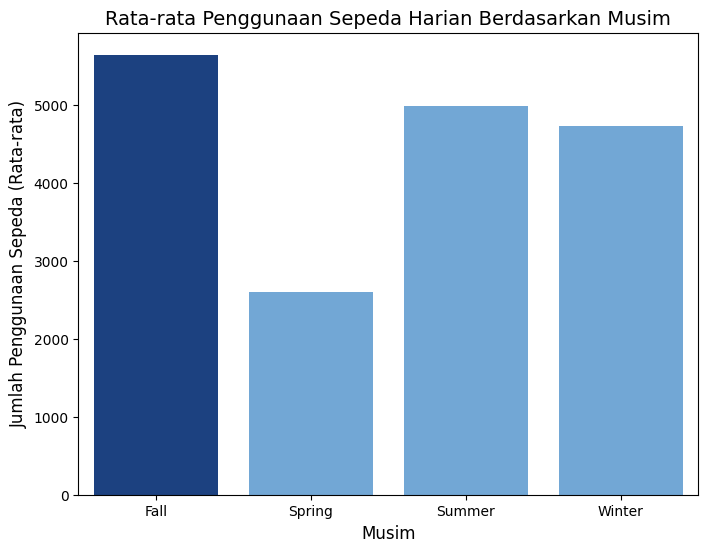

In [10]:
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_label'] = df['season'].map(season_labels)
season_usage = df.groupby('season_label')['cnt'].mean().reset_index()

dominant_color = '#0b3d91'
secondary_color = '#62a8e5'

max_value = season_usage['cnt'].max()
colors = [dominant_color if val == max_value else secondary_color for val in season_usage['cnt']]

plt.figure(figsize=(8, 6))
sns.barplot(data=season_usage, x='season_label', y='cnt', palette=colors)

plt.title('Rata-rata Penggunaan Sepeda Harian Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Penggunaan Sepeda (Rata-rata)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Fall adalah musim dengan penggunaan sepeda tertinggi, yang akan menjadi musim yang tepat untuk melakukan promosi lebih banyak untuk penyewaan sepeda.
- Spring memiliki penggunaan paling sedikit, mungkin karena faktor cuaca atau alasan lainnya yang memengaruhi aktivitas bersepeda.

### Pertanyaan 2:

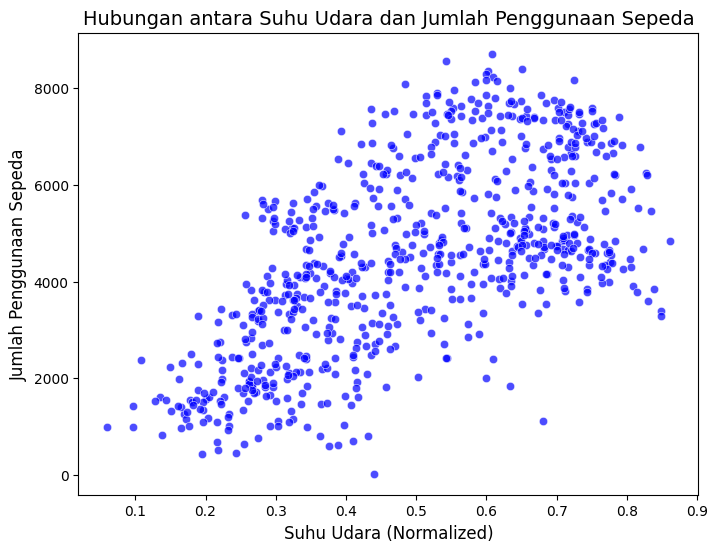

Koefisien Korelasi antara Suhu Udara dan Jumlah Penggunaan Sepeda: 0.63


In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='temp', y='cnt', alpha=0.7, color='blue')
plt.title('Hubungan antara Suhu Udara dan Jumlah Penggunaan Sepeda', fontsize=14)
plt.xlabel('Suhu Udara (Normalized)', fontsize=12)
plt.ylabel('Jumlah Penggunaan Sepeda', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

correlation = df['temp'].corr(df['cnt'])
print(f"Koefisien Korelasi antara Suhu Udara dan Jumlah Penggunaan Sepeda: {correlation:.2f}")


**Insight:**
- Nilai 0.63 menunjukkan korelasi positif yang cukup kuat. Artinya, saat suhu udara meningkat, jumlah penggunaan sepeda juga cenderung meningkat. Suhu udara menjadi salah satu faktor penting yang memengaruhi minat masyarakat dalam menggunakan sepeda.
- Korelasi positif ini mengindikasikan bahwa cuaca hangat (tetapi tidak ekstrem) lebih mendukung aktivitas bersepeda. Strategi operasional seperti peningkatan jumlah sepeda atau promosi layanan dapat difokuskan pada hari-hari dengan suhu yang optimal.

## Analisis Lanjutan (Analisis Faktor Musim dan Suhu Secara Bersamaan)

In [12]:
season_temp_cnt_summary = df.groupby('season_label')[['temp', 'cnt']].describe()

season_temp_cnt_corr = df.groupby('season_label').apply(lambda x: x['temp'].corr(x['cnt']))

print("Descriptive Statistics for Temperature and Bike Usage by Season:")
print(season_temp_cnt_summary)

print("\nCorrelation Between Temperature and Bike Usage by Season:")
print(season_temp_cnt_corr)

Descriptive Statistics for Temperature and Bike Usage by Season:
               temp                                                    \
              count      mean       std       min       25%       50%   
season_label                                                            
Fall          188.0  0.706309  0.070848  0.469167  0.667083  0.714583   
Spring        181.0  0.297748  0.102735  0.059130  0.222500  0.285833   
Summer        184.0  0.544405  0.122650  0.253043  0.458125  0.562083   
Winter        178.0  0.422906  0.107834  0.220833  0.331250  0.409166   

                                    cnt                                    \
                   75%       max  count         mean          std     min   
season_label                                                                
Fall          0.750208  0.861667  188.0  5644.303191  1459.800381  1115.0   
Spring        0.361739  0.572500  181.0  2604.132597  1399.942119   431.0   
Summer        0.631667  0.808333  184.

<ipython-input-12-51e64dea7214>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  season_temp_cnt_corr = df.groupby('season_label').apply(lambda x: x['temp'].corr(x['cnt']))


**Insight**

**Musim Gugur (Fall):**
- Suhu rata-rata tertinggi dibanding musim lain (0.706, nilai yang sudah dinormalisasi).
- Penggunaan sepeda harian rata-rata juga tertinggi (5,644 pengguna), dengan variasi yang moderat (standar deviasi 1,460).
- Korelasi antara suhu dan penggunaan sepeda kecil dan negatif (-0.033), menunjukkan bahwa suhu tidak berpengaruh signifikan pada jumlah pengguna selama musim gugur.

**Musim Semi (Spring):**
- Suhu rata-rata terendah (0.298) dengan distribusi yang lebih luas (standar deviasi 0.103).
- Penggunaan sepeda rata-rata paling rendah (2,604 pengguna), dengan standar deviasi 1,400.
- Korelasi yang tinggi antara suhu dan penggunaan sepeda (0.669), menunjukkan bahwa peningkatan suhu selama musim semi sangat memengaruhi peningkatan penggunaan sepeda.

**Musim Panas (Summer):**
- Suhu rata-rata cukup tinggi (0.544) dengan variasi moderat (standar deviasi 0.123).
- Penggunaan sepeda rata-rata cukup tinggi (4,992 pengguna), dengan distribusi yang cukup lebar (standar deviasi 1,696).
- Korelasi sedang (0.477), menunjukkan hubungan positif yang signifikan antara suhu dan penggunaan sepeda di musim panas, meskipun tidak sekuat musim semi.

**Musim Dingin (Winter):**
- Suhu rata-rata kedua terendah (0.423), dengan variasi yang kecil (standar deviasi 0.108).
- Penggunaan sepeda harian rata-rata 4,728 pengguna, lebih rendah dibanding musim panas dan musim gugur.
- Korelasi moderat (0.398), menunjukkan adanya hubungan positif antara suhu dan penggunaan sepeda, meskipun efeknya lebih kecil dibandingkan musim semi dan musim panas.

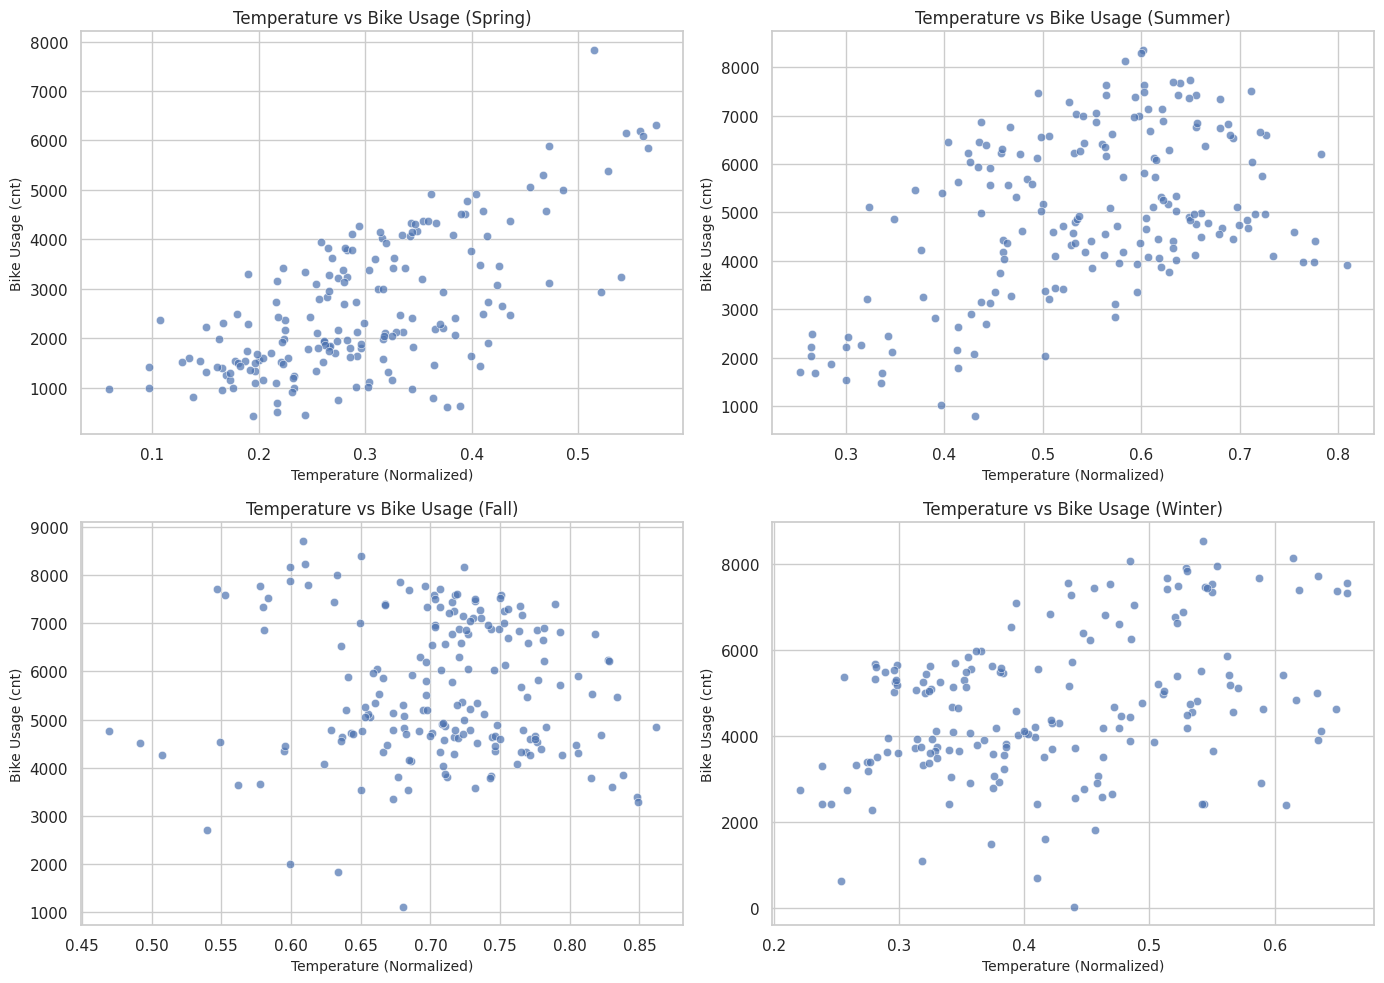

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))
season_labels = df['season_label'].unique()

for i, season in enumerate(season_labels, 1):
    plt.subplot(2, 2, i)
    season_data = df[df['season_label'] == season]
    sns.scatterplot(x='temp', y='cnt', data=season_data, alpha=0.7, color='b')
    plt.title(f'Temperature vs Bike Usage ({season})', fontsize=12)
    plt.xlabel('Temperature (Normalized)', fontsize=10)
    plt.ylabel('Bike Usage (cnt)', fontsize=10)

plt.tight_layout()
plt.show()

**Insight:**

**Musim Semi (Spring):**
- Korelasi tertinggi menunjukkan bahwa suhu memainkan peran penting dalam mendorong penggunaan sepeda.
- Suhu yang lebih hangat di musim semi tampaknya memberikan dorongan besar bagi orang untuk menggunakan sepeda.

**Musim Panas (Summer) dan Musim Dingin (Winter):**
- Korelasi sedang menunjukkan bahwa faktor-faktor selain suhu (seperti kelembapan, kecepatan angin, atau kenyamanan pengguna) mungkin juga memengaruhi pola penggunaan sepeda.

**Musim Gugur (Fall):**
- Korelasi yang hampir nol menyiratkan bahwa suhu bukanlah faktor utama. Faktor lain, seperti kondisi jalan, keindahan musim gugur, atau kebiasaan pengguna, mungkin lebih signifikan.

## Conclusion

**Conclution Pertanyaan 1 Pola Penggunaan Sepeda Berdasarkan Musim**
- Penggunaan tertinggi terjadi pada musim gugur (Fall) dengan rata-rata 5644 sepeda/hari, diikuti oleh musim panas (Summer) dan musim dingin (Winter).
- Musim semi (Spring) memiliki rata-rata penggunaan terendah sekitar 2604 sepeda/hari, yang mungkin disebabkan oleh cuaca yang kurang stabil pada awal tahun.
- Variasi penggunaan menunjukkan bahwa musim memengaruhi preferensi masyarakat dalam menggunakan sepeda, kemungkinan karena faktor cuaca, suhu, atau aktivitas musiman.

**Conclution Pertanyaan 2 Hubungan Suhu Udara dengan Jumlah Penggunaan Sepeda**
- Terdapat korelasi positif yang cukup kuat antara suhu udara (temp) dan jumlah penggunaan sepeda (cnt), dengan koefisien korelasi sebesar 0.63.
- Ini menunjukkan bahwa semakin hangat suhu udara, semakin banyak sepeda yang digunakan. Namun, suhu ekstrem (terlalu panas atau terlalu dingin) mungkin memiliki efek berbeda, yang membutuhkan analisis lebih mendalam.
- Rata-rata suhu dalam data sekitar 49,5% dari suhu maksimum yang dinormalisasi (41°C), menandakan sebagian besar data mencakup kondisi yang nyaman untuk bersepeda.

**Conclution Analisis Lanjutan**

Suhu memiliki pengaruh yang signifikan pada penggunaan sepeda di musim semi dan musim panas, di mana korelasi positif menunjukkan bahwa suhu yang lebih tinggi cenderung meningkatkan penggunaan sepeda. Sebaliknya, musim gugur menunjukkan bahwa faktor non-suhu lebih dominan dalam memengaruhi pola penggunaan sepeda.

In [ ]:
df.to_csv("all_data.csv", index=False)